In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"izmuhammadra","key":"ecca26ff376aa5ddee94b7ef560ef8d6"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d amin233/forex-top-currency-pairs-20002020
!unzip forex-top-currency-pairs-20002020.zip

 98% 33.0M/33.5M [00:02<00:00, 13.5MB/s]
100% 33.5M/33.5M [00:02<00:00, 12.8MB/s]
Archive:  forex-top-currency-pairs-20002020.zip
  inflating: AUDUSD-2000-2020-15m.csv  
  inflating: EURCHF-2000-2020-15m.csv  
  inflating: EURJPY-2000-2020-15m.csv  
  inflating: EURUSD-2000-2020-15m.csv  
  inflating: USDCAD-2000-2020-15m.csv  
  inflating: USDCHF-2000-2020-15m.csv  
  inflating: USDJPY-2000-2020-15m.csv  


In [ ]:
data = pd.read_csv('USDJPY-2000-2020-15m.csv', na_values='ND')

In [ ]:
data.shape

(500234, 5)

In [ ]:
data.head()

,DATE_TIME,HIGH,LOW,OPEN,CLOSE
0,2000.01.03 00:00:00,102.15,102.12,102.14,102.14
1,2000.01.03 00:15:00,102.26,102.13,102.15,102.26
2,2000.01.03 00:30:00,102.17,102.14,102.15,102.15
3,2000.01.03 00:45:00,102.20,102.12,102.16,102.20
4,2000.01.03 01:00:00,102.22,102.12,102.20,102.12


In [ ]:
data.describe()

,HIGH,LOW,OPEN,CLOSE
count,500234.000000,500234.000000,500234.000000,500234.000000
mean,106.682224,106.582364,106.632137,106.632081
std,13.154849,13.140162,13.147101,13.147111
min,75.696000,75.570000,75.642000,75.643000
25%,100.448250,100.340000,100.393250,100.394000
50%,109.079000,108.978000,109.030000,109.030000
75%,116.830000,116.702500,116.767000,116.768750
max,135.190000,134.940000,134.990000,134.980000


In [ ]:
data.isnull().sum()

DATE_TIME    0
HIGH         0
LOW          0
OPEN         0
CLOSE        0
dtype: int64

In [ ]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

<ipython-input-8-fa1560e9013b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


,DATE_TIME,HIGH,LOW,OPEN,CLOSE
0,2000.01.03 00:00:00,102.15,102.12,102.14,102.14
1,2000.01.03 00:15:00,102.26,102.13,102.15,102.26
2,2000.01.03 00:30:00,102.17,102.14,102.15,102.15
3,2000.01.03 00:45:00,102.20,102.12,102.16,102.20
4,2000.01.03 01:00:00,102.22,102.12,102.20,102.12


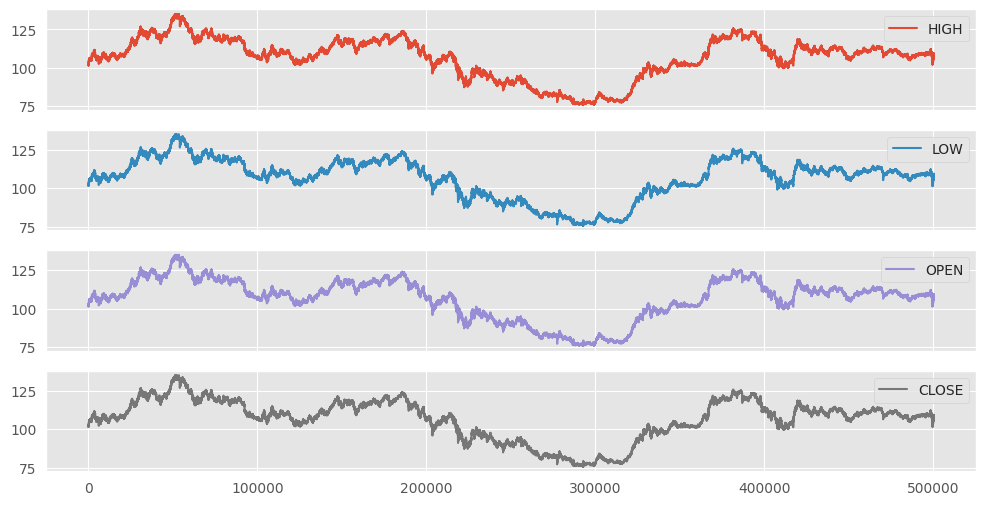

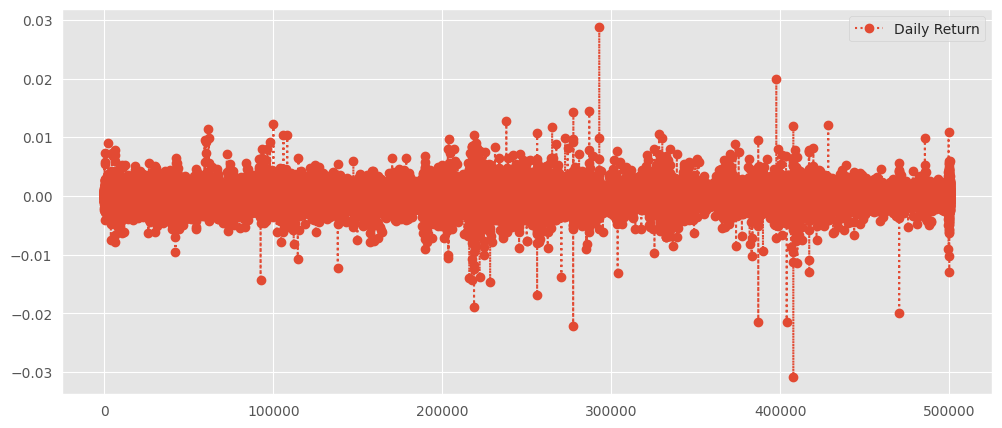

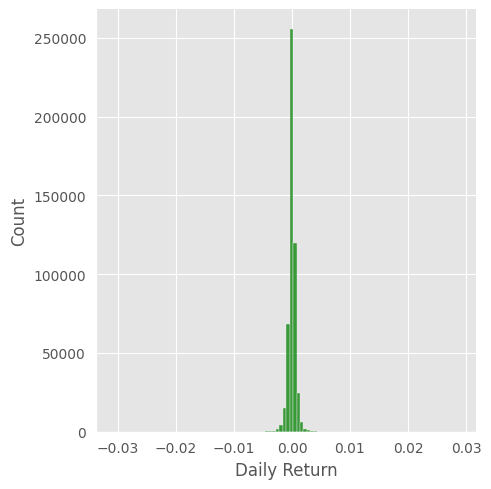

<ipython-input-9-68a4ce32ac5e>:34: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


                  DATE_TIME     HIGH      LOW     OPEN    CLOSE  \
0       2000.01.03 00:00:00  102.150  102.120  102.140  102.140   
1       2000.01.03 00:15:00  102.260  102.130  102.150  102.260   
2       2000.01.03 00:30:00  102.170  102.140  102.150  102.150   
3       2000.01.03 00:45:00  102.200  102.120  102.160  102.200   
4       2000.01.03 01:00:00  102.220  102.120  102.200  102.120   
...                     ...      ...      ...      ...      ...   
500229  2020.03.19 05:30:00  109.391  109.178  109.232  109.226   
500230  2020.03.19 05:45:00  109.340  109.210  109.225  109.285   
500231  2020.03.19 06:00:00  109.446  109.273  109.284  109.439   
500232  2020.03.19 06:15:00  109.553  109.400  109.439  109.401   
500233  2020.03.19 06:30:00  109.397  109.329  109.397  109.363   

        MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0           106.632097      106.632208       106.632385  3.554248e-07  
1           106.632097      106.632208       106.63

DATE_TIME          0
HIGH               0
LOW                0
OPEN               0
CLOSE              0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

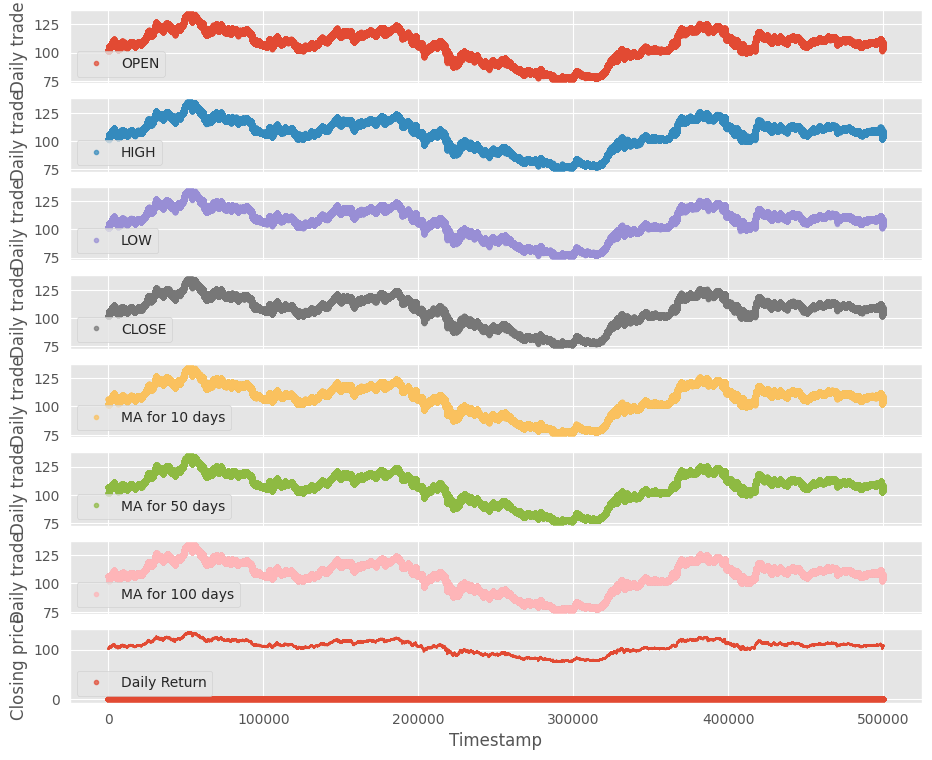

In [ ]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['CLOSE'],ma).mean()

data['Daily Return'] = data['CLOSE'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['DATE_TIME'])
closing_df1 = pd.DataFrame(data['CLOSE'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['OPEN', 'HIGH', 'LOW','CLOSE','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['CLOSE'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

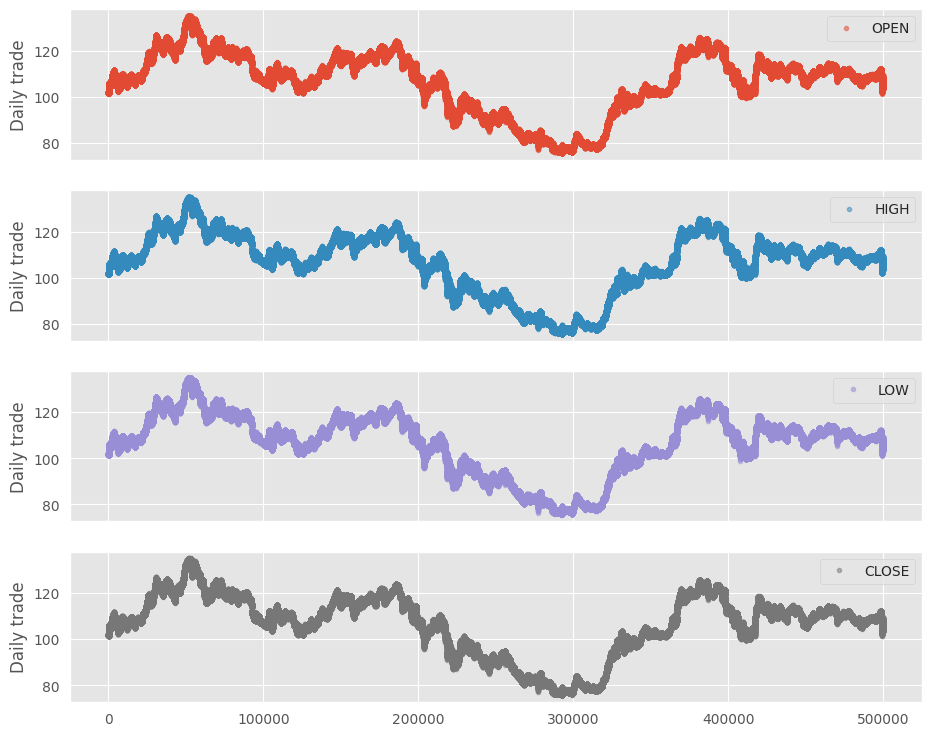

In [ ]:
cols_plot = ['OPEN', 'HIGH', 'LOW','CLOSE']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

                  DATE_TIME     HIGH      LOW     OPEN    CLOSE  \
0       2000.01.03 00:00:00  102.150  102.120  102.140  102.140   
1       2000.01.03 00:15:00  102.260  102.130  102.150  102.260   
2       2000.01.03 00:30:00  102.170  102.140  102.150  102.150   
3       2000.01.03 00:45:00  102.200  102.120  102.160  102.200   
4       2000.01.03 01:00:00  102.220  102.120  102.200  102.120   
...                     ...      ...      ...      ...      ...   
500229  2020.03.19 05:30:00  109.391  109.178  109.232  109.226   
500230  2020.03.19 05:45:00  109.340  109.210  109.225  109.285   
500231  2020.03.19 06:00:00  109.446  109.273  109.284  109.439   
500232  2020.03.19 06:15:00  109.553  109.400  109.439  109.401   
500233  2020.03.19 06:30:00  109.397  109.329  109.397  109.363   

        MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0           106.632097      106.632208       106.632385  3.554248e-07  
1           106.632097      106.632208       106.63

,count,mean,std,min,25%,50%,75%,max
HIGH,500234.0,1.066822e+02,13.154849,75.696000,100.448250,109.07900,116.830000,135.19000
LOW,500234.0,1.065824e+02,13.140162,75.570000,100.340000,108.97800,116.702500,134.94000
OPEN,500234.0,1.066321e+02,13.147101,75.642000,100.393250,109.03000,116.767000,134.99000
CLOSE,500234.0,1.066321e+02,13.147111,75.643000,100.394000,109.03000,116.768750,134.98000
MA for 10 days,500234.0,1.066321e+02,13.146812,75.705400,100.384175,109.02695,116.765000,134.91600
MA for 50 days,500234.0,1.066322e+02,13.145650,75.735480,100.396655,109.03439,116.783200,134.78880
MA for 100 days,500234.0,1.066324e+02,13.144213,75.796980,100.400053,109.04179,116.804300,134.67780
Daily Return,500234.0,3.554248e-07,0.000661,-0.030815,-0.000274,0.00000,0.000279,0.02882


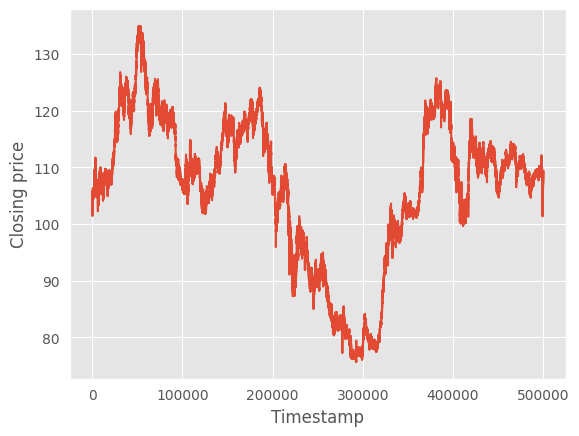

In [ ]:
plt.plot(data['CLOSE'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [ ]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))
2470
618

400105
100027


618

In [ ]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=5,batch_size=5, verbose=1, shuffle =True)

Epoch 1/5
80021/80021 [==============================] - 1004s 12ms/step - loss: 6.6323e-06 - mse: 6.6323e-06 - mae: 0.0018 - val_loss: 12054.6328 - val_mse: 12054.6328 - val_mae: 109.7410
Epoch 2/5
80021/80021 [==============================] - 1028s 13ms/step - loss: 5.0654e-06 - mse: 5.0654e-06 - mae: 0.0016 - val_loss: 12054.8320 - val_mse: 12054.8320 - val_mae: 109.7420
Epoch 3/5
80021/80021 [==============================] - 1029s 13ms/step - loss: 4.7087e-06 - mse: 4.7087e-06 - mae: 0.0015 - val_loss: 12054.5039 - val_mse: 12054.5039 - val_mae: 109.7404
Epoch 4/5
80021/80021 [==============================] - 1029s 13ms/step - loss: 4.4973e-06 - mse: 4.4973e-06 - mae: 0.0015 - val_loss: 12054.6719 - val_mse: 12054.6719 - val_mae: 109.7411
Epoch 5/5
80021/80021 [==============================] - 1032s 13ms/step - loss: 4.4006e-06 - mse: 4.4006e-06 - mae: 0.0015 - val_loss: 12054.6445 - val_mse: 12054.6445 - val_mae: 109.7411


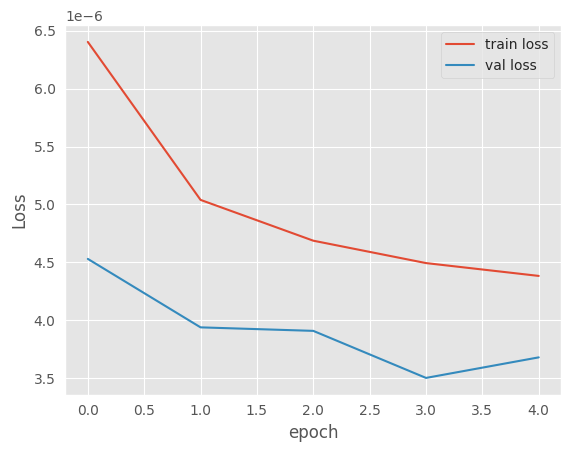

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

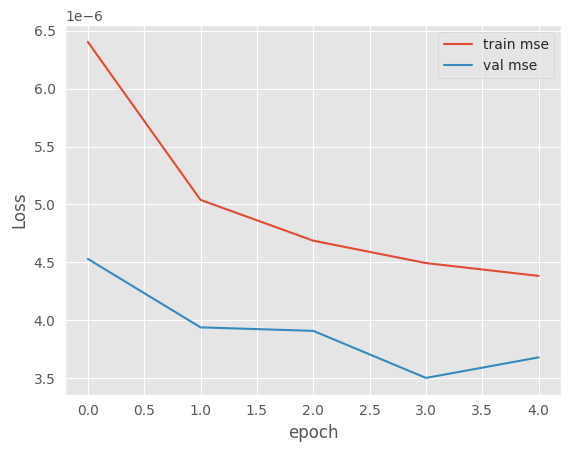

In [ ]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

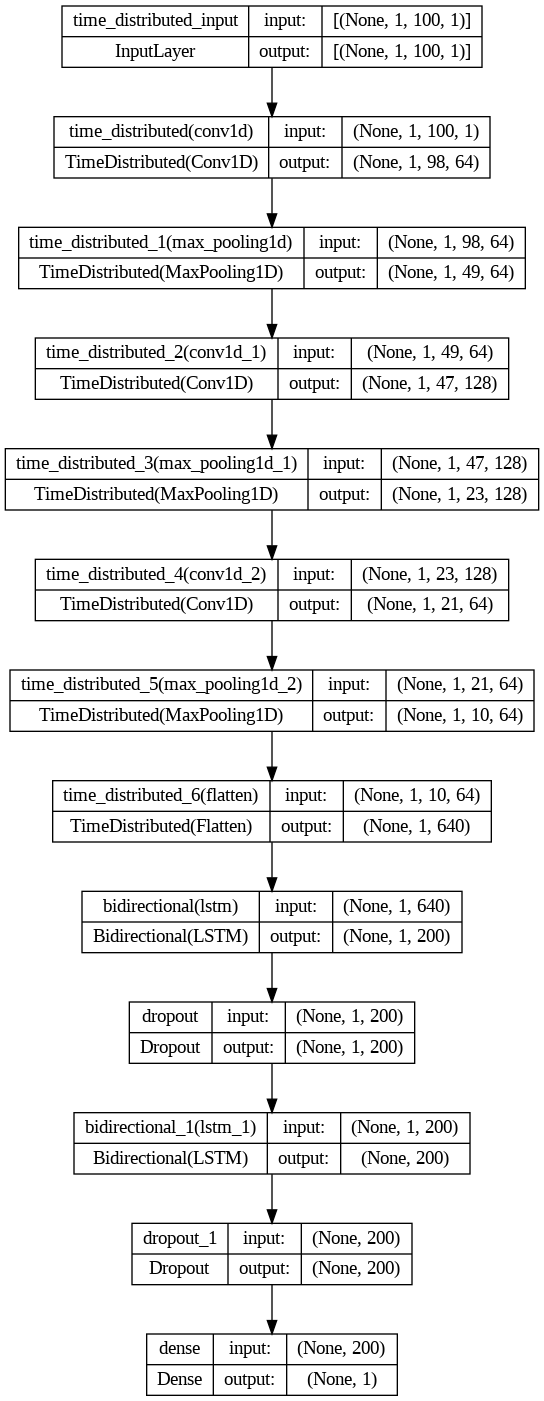

In [ ]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(test_X, test_Y)

3126/3126 [==============================] - 20s 6ms/step - loss: 3.6792e-06 - mse: 3.6792e-06 - mae: 0.0013


[3.679217570606852e-06, 3.679217570606852e-06, 0.0012759862001985312]

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.910165
R2 Score: 0.910165
Max Error: 0.047540


3126/3126 [==============================] - 18s 6ms/step


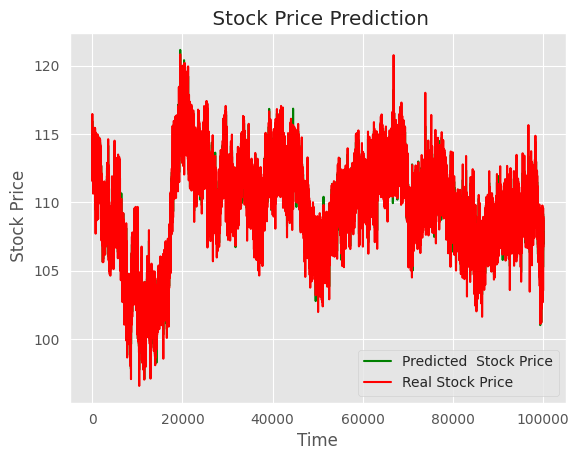

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()